In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Data Collection And Analysis

In [5]:
customer_data = pd.read_csv(r"C:\Users\Hp\Documents\ML Stuff\Mall_Customers.csv")

In [6]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#No of rows and columns
customer_data.shape

(200, 5)

In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
#Missing Values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
#Choosing annual income and spending score column
x = customer_data.iloc[:,[3,4]].values

In [14]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [15]:
#Choosing number of clusters
#In beginning, we don't know how many clusters we need to create. Could be 3,4 or 5. 
#But what is the optimum no of clusters that are suitable here?
# For this, we can use WCSS. : Within Cluster Sum of Squares (WCSS)
# the sum of the squared distance between each member of the cluster and its centroid.
# For this, we create an elbow graph to determine the number of clusters

In [17]:
#Using the preceding code, we set the number of desired clusters to 3. We set n_init=10 to run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE. Via the max_iter parameter, we specify the maximum number of iterations for each single run (here, 300).

#Note that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached. However, it is possible that k-means does not reach convergence for a particular run, which can be problematic (computationally expensive) if we choose relatively large values for max_iter.

#One way to deal with convergence problems is to choose larger values for tol, which is a parameter that controls the tolerance with regard to the changes in the within-cluster sum-squared-error to declare convergence. In the preceding code, we chose a tolerance of 1e-04 (= 0.0001).

#A problem with k-means is that one or more clusters can be empty. However, this problem is accounted for in the current k-means implementation in scikit-learn. If a cluster is empty, the algorithm will search for the sample that is farthest away from the centroid of the empty cluster. Then it will reassign the centroid to be this farthest point.

#Now that we have predicted the cluster labels y_km, let’s visualize the clusters that k-means identified in the dataset together with the cluster centroids. These are stored under the cluster_centers_ attribute of the fitted KMeans object:

#In the resulting scatterplot, we can see that k-means placed the three centroids at the center of each sphere, which looks like a reasonable grouping given this dataset.

#The Elbow Method
#Although k-means worked well on this toy dataset, it is important to reiterate that a drawback of k-means is that we have to specify the number of clusters, k, before we know what the optimal k is. The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized.

#The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.

#The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k:

#As we can see in the resulting plot, the elbow is located at k = 3, which is evidence that k = 3 is indeed a good choice for this dataset.

#I hope you enjoyed this tutorial on the k-means algorithm! We explored the basic concepts and mathematics behind the k-means algorithm, how to implement k-means, and how to select an optimal number of clusters, k.

#If you’d like to learn more, Next Tech’s Python Machine Learning (Part 3) course further explores clustering algorithms and techniques such as:

#Silhouette plots, another method used to select the optimal k
#k-means++, a variant of k-means, that improves clustering results through more clever seeding of the initial cluster centers.

In [18]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


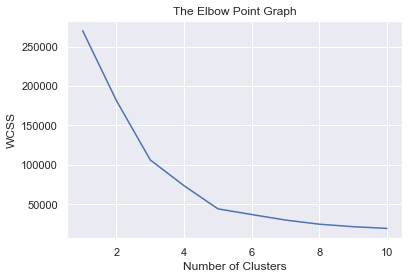

In [22]:
#Plot elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
#Optimum no of clusters will be chosen as 5

In [24]:
#Training the model

In [26]:
kmeans = KMeans(n_clusters= 5, init= 'k-means++', random_state=0)

In [27]:
#Return a datapoint based on their cluster

In [28]:
y = kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


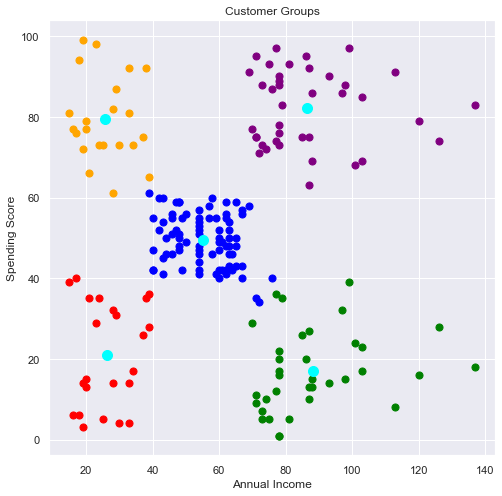

In [41]:
#Visualizing the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1], s= 50, c = 'green', label = 'Cluster1')
plt.scatter(x[y==1,0],x[y==1,1], s= 50, c = 'blue', label = 'Cluster2')
plt.scatter(x[y==2,0],x[y==2,1], s= 50, c = 'purple', label = 'Cluster3')
plt.scatter(x[y==3,0],x[y==3,1], s= 50, c = 'orange', label = 'Cluster4')
plt.scatter(x[y==4,0],x[y==4,1], s= 50, c = 'red', label = 'Cluster5')

#Plot centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan', label = 'Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()